In [41]:
# IMPORTING PACKAGES

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from termcolor import colored as cl # text customization

from sklearn.model_selection import train_test_split # data split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

from sklearn.ensemble import ExtraTreesRegressor

sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size

import tensorflow as tf

In [42]:
data = pd.read_csv("../data/data_timbre.csv")

labels = pd.DataFrame(data['track_number']/data['total_tracks'])

columns_to_remove = [
                'Unnamed: 0',
                'Unnamed: 0.1',
                'id',
                'track_title',
                'album_title',
                'album_artist',
                'track_number',
                'total_tracks',
                'order',
                'key',
                'mode',
                'duration_ms',
                'time_signature']
                  
data.drop(columns = columns_to_remove, axis = 1, inplace = True)


# Rounding
def custom_round(x, base=0.05):
    return int(base * round(float(x)/base))

from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
labels = labels.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(labels)
labels = pd.DataFrame(x_scaled)

labels = labels.round(1)
labels

data['labels'] = labels


In [43]:
data.dropna(inplace = True)
df = data

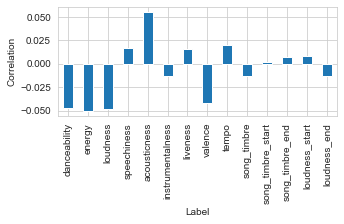

In [44]:
# sb.heatmap(abs(data.corr()), annot = True, cmap = 'Blues')
import math
fig = plt.figure(figsize = (5,2))
# sb.heatmap(abs(data.corr()), vmax = .8, square = True, annot = True)
# plt.show()

graph = data.corr()['labels'].drop('labels').plot.bar()
graph.set_xlabel("Label")
graph.set_ylabel("Correlation")
plt.savefig('labelCorr.png', bbox_inches='tight')

In [45]:
# FEATURE SELECTION & DATA SPLIT

X_var = df.values
y_var = labels[0].values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, stratify=y_var, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)
y_train

array([0.4, 0.1, 0.4, ..., 0.2, 0.1, 0.9])

In [46]:
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,song_timbre,song_timbre_start,song_timbre_end,loudness_start,loudness_end,labels
0,0.788,0.616,-10.671,0.0337,0.00286,0.549000,0.0952,0.6960,119.037,0.410775,0.502790,0.381447,-50.058500,-50.912,0.1
1,0.712,0.500,-11.948,0.0338,0.82500,0.314000,0.1060,0.6820,90.039,0.288576,0.358865,0.420081,-40.046167,-46.607,0.1
2,0.740,0.682,-10.420,0.0504,0.06920,0.530000,0.3810,0.4100,113.201,0.295317,0.452228,0.415978,-14.745556,-42.064,0.2
3,0.702,0.297,-14.116,0.0317,0.89400,0.485000,0.1030,0.0676,110.116,0.292235,0.431800,0.463382,-38.945889,-58.058,0.3
4,0.775,0.585,-9.516,0.0271,0.04220,0.619000,0.0770,0.5180,109.942,0.195611,0.382496,0.894774,-14.908800,-0.241,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4944,0.530,0.275,-13.868,0.0349,0.46000,0.000011,0.0729,0.0698,133.973,0.140222,0.303244,0.675694,-8.244444,-16.261,0.7
4945,0.490,0.495,-12.252,0.0338,0.17300,0.000000,0.0794,0.2300,148.967,0.156536,0.221387,0.418692,-48.704600,-48.996,0.8
4946,0.767,0.355,-10.031,0.0445,0.14600,0.000000,0.2980,0.2880,119.992,0.272332,0.456071,0.726044,-21.911778,-56.151,0.9
4947,0.743,0.379,-13.629,0.0784,0.20700,0.196000,0.1110,0.1830,127.030,0.172822,0.095022,1.000000,-16.969600,-5.312,0.9


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 

In [48]:
# NN_model = Sequential()

# # The Input Layer :
# NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# # The Hidden Layers :
# NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
# NN_model.add(Flatten())
# NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))

# # The Output Layer :
# NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# # Compile the network :
# NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [49]:
# NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2)

In [50]:
# REGRESSSION MODELING
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesRegressor

# MLP Regressor:
model = MLPRegressor(random_state=1, max_iter=1000).fit(X_train, y_train)
# model.fit(X_train, y_train)
yhat = model.predict(X_test)
pickle.dump(model, open('MLPRegressor.sav', 'wb'))

print(cl('mean_squared_error of model is {}'.format(mean_squared_error(y_test, yhat)), attrs = ['bold']))
print(cl('explained_variance_score of model is {}'.format(explained_variance_score(y_test, yhat)), attrs = ['bold']))
print(cl('r2_score of model is {}'.format(r2(y_test, yhat)), attrs = ['bold']))
print(cl('mean_absolute_error of model is {}'.format(mean_absolute_error(y_test, yhat)), attrs = ['bold']))

mean_squared_error of model is 0.00442767664351457
explained_variance_score of model is 0.9544272551068075
r2_score of model is 0.9493067679605487
mean_absolute_error of model is 0.04788207932890595


In [51]:
# # DNN Regressor:
# yhat = NN_model.predict(X_test)
# pickle.dump(NN_model, open('DNNRegressor.sav', 'wb'))

# print(cl('mean_squared_error of model is {}'.format(mean_squared_error(y_test, yhat)), attrs = ['bold']))
# print(cl('explained_variance_score of model is {}'.format(explained_variance_score(y_test, yhat)), attrs = ['bold']))
# print(cl('r2_score of model is {}'.format(r2(y_test, yhat)), attrs = ['bold']))
# print(cl('mean_absolute_error of model is {}'.format(mean_absolute_error(y_test, yhat)), attrs = ['bold']))

In [52]:
# Random Forest:
random_forest = ExtraTreesRegressor(n_estimators=1000).fit(X_train, y_train)
yhat = random_forest.predict(X_test)
pickle.dump(random_forest, open('random_forest.sav', 'wb'))

print(cl('mean_squared_error of model is {}'.format(mean_squared_error(y_test, yhat)), attrs = ['bold']))
print(cl('explained_variance_score of model is {}'.format(explained_variance_score(y_test, yhat)), attrs = ['bold']))
print(cl('r2_score of model is {}'.format(r2(y_test, yhat)), attrs = ['bold']))
print(cl('mean_absolute_error of model is {}'.format(mean_absolute_error(y_test, yhat)), attrs = ['bold']))

mean_squared_error of model is 5.1051511461464e-29
explained_variance_score of model is 1.0
r2_score of model is 1.0
mean_absolute_error of model is 5.345010917443653e-15


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

parameters = {'n_estimators':[10, 50, 100, 200, 500, 1000], 'max_depth':[None, 3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_split':[1, 2, 3, 4, 5]} # 'min_samples_leaf':[1, 2, 3, 4, 5], 'max_leaf_nodes':[1, 2, 3, 4, 5]}
              
RF = ExtraTreesRegressor()
clf = GridSearchCV(RF, parameters, return_train_score=True, n_jobs=-1)
clf.fit(X_train, y_train)
clf.best_estimator_

In [ ]:
MSEs_Test = []
MSEs_Train = []
R2s_Test = []
R2s_Train = []
train_sizes = [round(len(X_train)*0.2), round(len(X_train)*0.4), round(len(X_train)*0.6), round(len(X_train)*0.8), round(len(X_train)*1)]

for i in range(5):
    random_forest = ExtraTreesRegressor(n_estimators=1000).fit(X_train[:train_sizes[i]], y_train[:train_sizes[i]])
    yhat = random_forest.predict(X_test)
    y_train_hat = random_forest.predict(X_train)
    MSEs_Test.append(mean_squared_error(y_test, yhat))
    MSEs_Train.append(mean_squared_error(y_train, y_train_hat))
    R2s_Test.append(r2(y_test, yhat))
    R2s_Train.append(r2(y_train, y_train_hat))

_, axes = plt.subplots(figsize=[6,4])
axes.plot(train_sizes, R2s_Train, "o-", color="r", label="R2 training score")
axes.plot(train_sizes, R2s_Test, "o-", color="g", label="R2 test score")
axes.plot(train_sizes, MSEs_Train, "o-", color="b", label="MSE training score")
axes.plot(train_sizes, MSEs_Test, "o-", color="m", label="MSE test score")
axes.legend(loc='best')
axes.set_xlabel("Training examples")
axes.set_ylabel("Score")
plt.show()
plt.savefig('ExtraTrees.png')

In [ ]:
# Autoencoder

# Encode
encoder = tf.keras.models.load_model('encoder.h5')
encoded_tracks_train = encoder.predict(X_train)
encoded_tracks_test = encoder.predict(X_test)

# Train random forest on encoded data:
autoencoder_random_forest = ExtraTreesRegressor(n_estimators=1000).fit(encoded_tracks_train, y_train)
yhat = autoencoder_random_forest.predict(encoded_tracks_test)
pickle.dump(autoencoder_random_forest, open('autoencoder_random_forest.sav', 'wb'))

# Evaluation
print(cl('mean_squared_error of model is {}'.format(mean_squared_error(y_test, yhat)), attrs = ['bold']))
print(cl('explained_variance_score of model is {}'.format(explained_variance_score(y_test, yhat)), attrs = ['bold']))
print(cl('r2_score of model is {}'.format(r2(y_test, yhat)), attrs = ['bold']))
print(cl('mean_absolute_error of model is {}'.format(mean_absolute_error(y_test, yhat)), attrs = ['bold']))